In [1]:
! pip install ipython-autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.0 MB/s 


In [2]:
# load time of execution for each block
%load_ext autotime

time: 383 µs (started: 2022-11-03 05:49:03 +00:00)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.manifold import TSNE

time: 1.56 s (started: 2022-11-03 05:49:04 +00:00)


In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
data = digits.images[0]

time: 407 µs (started: 2022-11-03 05:49:05 +00:00)


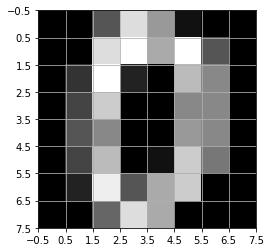

time: 119 ms (started: 2022-11-03 05:49:05 +00:00)


In [6]:
#Display the first digit
plt.imshow(data, cmap = 'gray', interpolation='nearest')
plt.xticks(np.arange(-0.5, 8.5, 1))
plt.yticks(np.arange(-0.5, 8.5, 1))
plt.grid(True)
plt.show()

In [7]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

time: 4.24 ms (started: 2022-11-03 05:49:05 +00:00)


In [8]:
digits.images[0].shape

(8, 8)

time: 5.17 ms (started: 2022-11-03 05:49:05 +00:00)


In [9]:
digits.data[0].shape

(64,)

time: 3.29 ms (started: 2022-11-03 05:49:05 +00:00)


In [10]:
digitsX = digits.data
digitsY = digits.target

time: 622 µs (started: 2022-11-03 05:49:05 +00:00)


### PCA on the Digits Dataset - 2 Components

In [11]:
pca2 = PCA(n_components = 2)
digits_pca2 = pca2.fit_transform(digitsX)

time: 52.1 ms (started: 2022-11-03 05:49:05 +00:00)


In [12]:
print(pca2.explained_variance_ratio_)
print(pca2.singular_values_)

[0.14890594 0.13618771]
[567.0065665  542.25185421]
time: 901 µs (started: 2022-11-03 05:49:06 +00:00)


In [13]:
digits_pca2 = pd.DataFrame(data = digits_pca2, columns = ['comp1', 'comp2'])
digits_pca2['label'] = digitsY

time: 18.4 ms (started: 2022-11-03 05:49:06 +00:00)


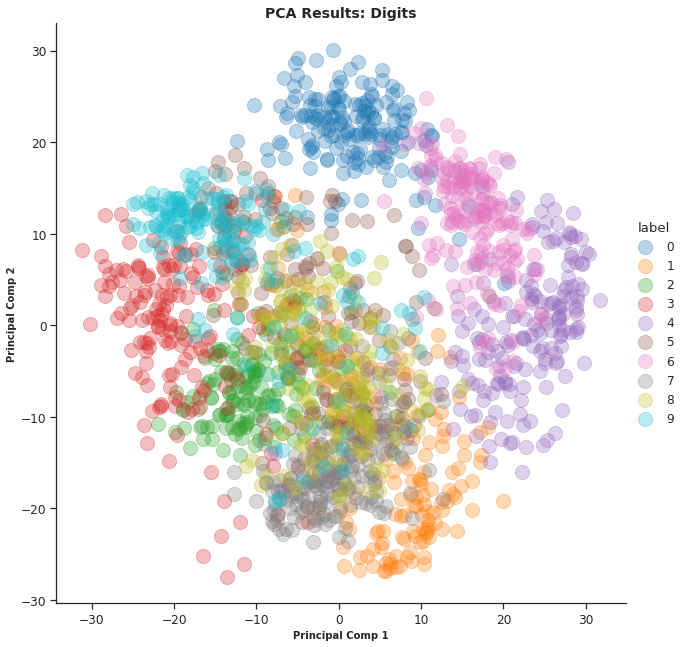

time: 693 ms (started: 2022-11-03 05:49:06 +00:00)


In [14]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='comp1',
           y='comp2',
           data=digits_pca2,
           fit_reg=False,
           legend=True,
           height=9,
           hue = 'label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')

### SVD on Digits- 2 Components

In [15]:
svd2 = TruncatedSVD(n_components = 2)

time: 598 µs (started: 2022-11-03 05:49:06 +00:00)


In [16]:
digits_svd2 = svd2.fit_transform(digitsX)

time: 18.7 ms (started: 2022-11-03 05:49:06 +00:00)


In [17]:
digits_svd2 = pd.DataFrame(data = digits_svd2, columns = ['comp1', 'comp2'])
digits_svd2['label'] = digitsY

time: 4.21 ms (started: 2022-11-03 05:49:06 +00:00)


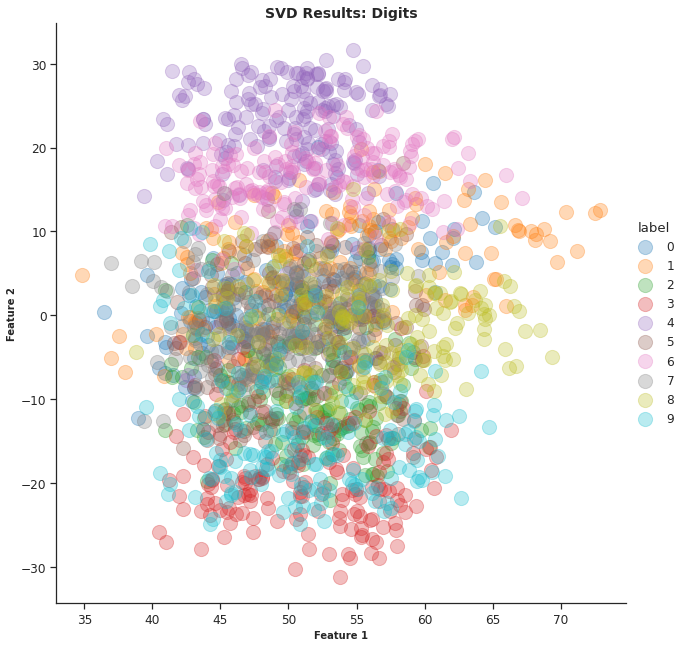

time: 599 ms (started: 2022-11-03 05:49:06 +00:00)


In [18]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='comp1',
           y='comp2',
           data=digits_svd2,
           fit_reg=False,
           legend=True,
           height=9,
           hue = 'label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('SVD Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Feature 1', weight='bold').set_fontsize('10')
plt.ylabel('Feature 2', weight='bold').set_fontsize('10')

### PCA on Digits - 3 Components

In [19]:
pca3 = PCA(n_components = 3)
digits_pca3= pca3.fit_transform(digitsX)

time: 32.5 ms (started: 2022-11-03 05:49:07 +00:00)


In [20]:
digits_pca3.shape

(1797, 3)

time: 5.64 ms (started: 2022-11-03 05:49:07 +00:00)


In [21]:
digits_pca3 = pd.DataFrame(data = digits_pca3, columns = ['comp1', 'comp2', 'comp3'])
digits_pca3['label'] = digitsY

time: 2.16 ms (started: 2022-11-03 05:49:07 +00:00)


In [22]:
# This is the 3D plotting toolkit
from mpl_toolkits.mplot3d import Axes3D

time: 450 µs (started: 2022-11-03 05:49:07 +00:00)


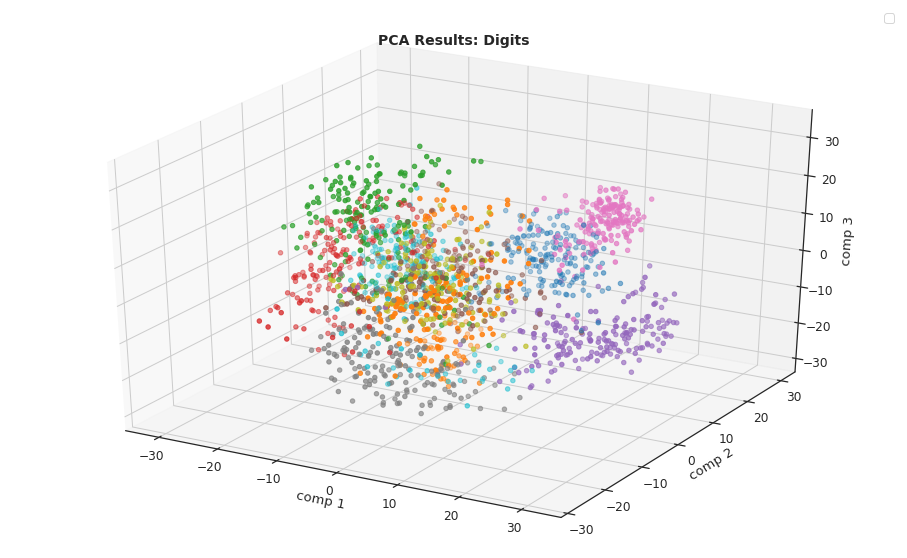

time: 281 ms (started: 2022-11-03 05:49:07 +00:00)


In [23]:
plt.figure(figsize = (16, 10))
ax = plt.axes(projection='3d')
ax.scatter(
    xs=digits_pca3.loc[:, 'comp1'], 
    ys=digits_pca3.loc[:, 'comp2'], 
    zs=digits_pca3.loc[:, 'comp3'], 
    c=digits_pca3.loc[:, 'label'], 
    cmap='tab10'
)
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')
ax.legend()
plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.show()

### SVD on Digits - 3 Components

In [24]:
svd3 = TruncatedSVD(n_components = 3)

time: 613 µs (started: 2022-11-03 05:49:07 +00:00)


In [25]:
digits_svd3 = svd3.fit_transform(digitsX)

time: 34.1 ms (started: 2022-11-03 05:49:07 +00:00)


In [26]:
digits_svd3 = pd.DataFrame(data = digits_svd3, columns = ['comp1', 'comp2', 'comp3'])
digits_svd3['label'] = digitsY

time: 4.72 ms (started: 2022-11-03 05:49:07 +00:00)


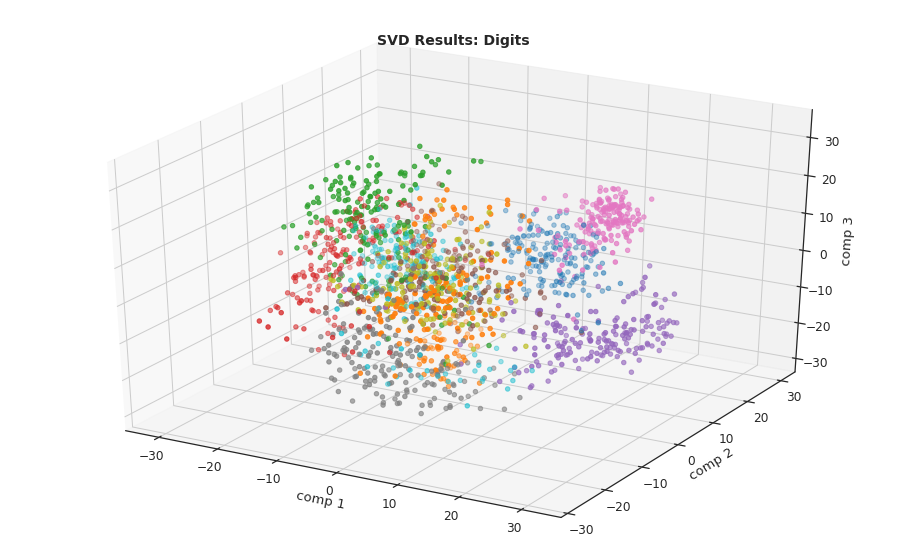

time: 253 ms (started: 2022-11-03 05:49:07 +00:00)


In [27]:
plt.figure(figsize = (16, 10))
ax = plt.axes(projection='3d')
ax.scatter(
    xs=digits_pca3.loc[:, 'comp1'], 
    ys=digits_pca3.loc[:, 'comp2'], 
    zs=digits_pca3.loc[:, 'comp3'], 
    c=digits_pca3.loc[:, 'label'], 
    cmap='tab10',
)
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')
plt.title('SVD Results: Digits', weight='bold').set_fontsize('14')
plt.show()

In [28]:
from sklearn.datasets import fetch_openml
mnistX, mnistY = fetch_openml('mnist_784', version=1, return_X_y=True)

time: 47.7 s (started: 2022-11-03 05:49:08 +00:00)


In [29]:
mnistX.shape

(70000, 784)

time: 7.11 ms (started: 2022-11-03 05:49:55 +00:00)


### PCA on MNIST - 2 Components

In [30]:
mnist_pca2 = pca2.fit_transform(mnistX)

time: 3.42 s (started: 2022-11-03 05:49:55 +00:00)


In [31]:
mnist_pca2 = pd.DataFrame(data = mnist_pca2, columns = ['comp1', 'comp2'])
mnist_pca2['label'] = mnistY

time: 2.41 ms (started: 2022-11-03 05:49:59 +00:00)


In [32]:
print(pca2.explained_variance_ratio_)
print(pca2.singular_values_)

[0.09746116 0.07155445]
[152971.40256765 131072.85926519]
time: 915 µs (started: 2022-11-03 05:49:59 +00:00)


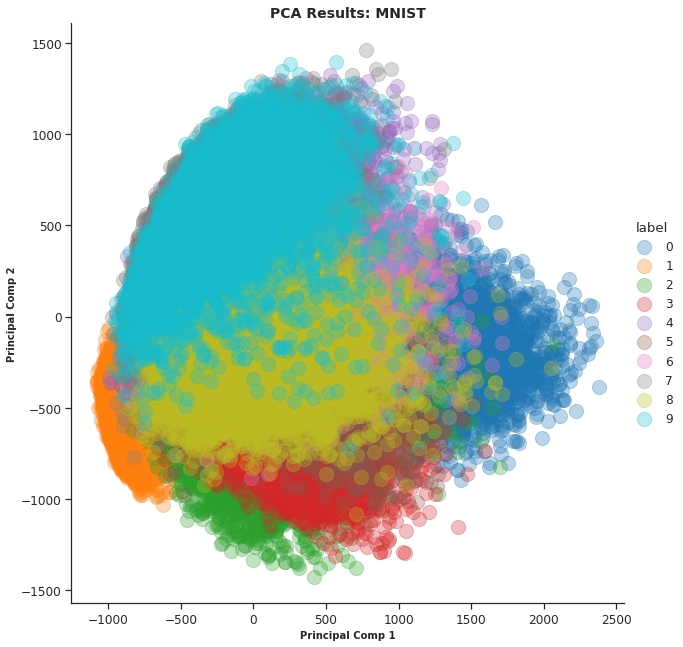

time: 1.84 s (started: 2022-11-03 05:49:59 +00:00)


In [33]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='comp1',
           y='comp2',
           data=mnist_pca2,
           fit_reg=False,
           legend=True,
           height=9,
           hue = 'label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: MNIST', weight='bold').set_fontsize('14')
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')

### SVD on MNIST - 2 Components

In [34]:
mnist_svd2 = svd2.fit_transform(mnistX)
mnist_svd2.shape

(70000, 2)

time: 2.89 s (started: 2022-11-03 05:50:01 +00:00)


In [35]:
mnist_svd2 = pd.DataFrame(data = mnist_svd2, columns = ['comp1', 'comp2'])
mnist_svd2['label'] = mnistY

time: 1.98 ms (started: 2022-11-03 05:50:04 +00:00)


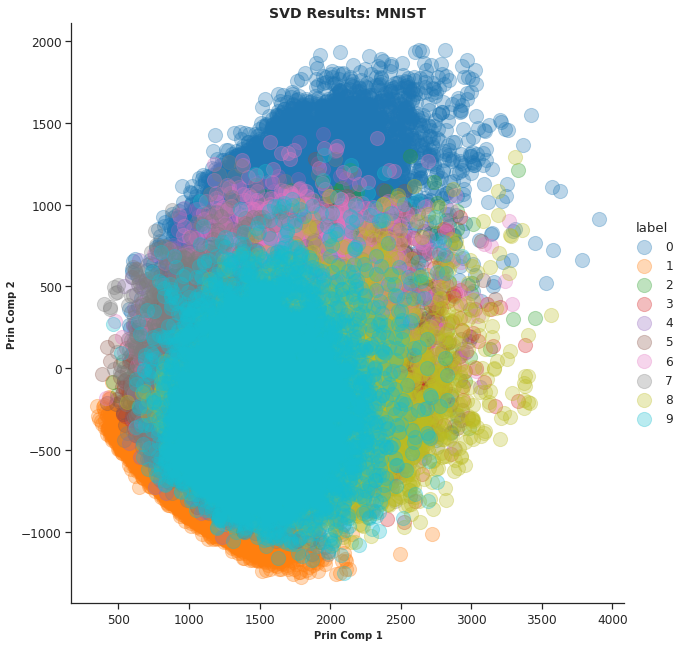

time: 2.13 s (started: 2022-11-03 05:50:04 +00:00)


In [36]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='comp1',
           y='comp2',
           data=mnist_svd2,
           fit_reg=False,
           legend=True,
           height=9,
           hue = 'label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('SVD Results: MNIST', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

### PCA on MNIST - 3 Components

In [37]:
mnist_pca3 = pca3.fit_transform(mnistX)

time: 3.77 s (started: 2022-11-03 05:50:06 +00:00)


In [38]:
mnist_pca3 = pd.DataFrame(data = mnist_pca3, columns = ['comp1', 'comp2', 'comp3'])
mnist_pca3['label'] = mnistY

time: 3.58 ms (started: 2022-11-03 05:50:10 +00:00)


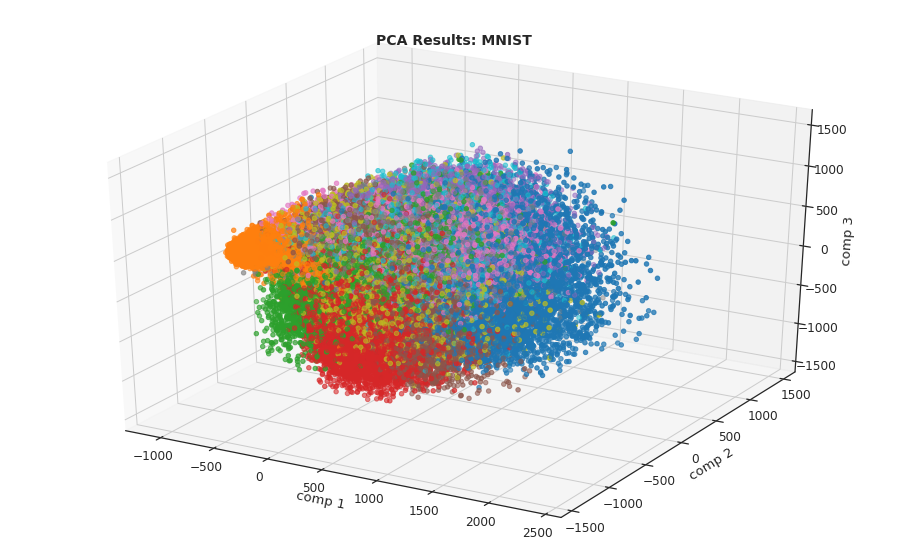

time: 1.45 s (started: 2022-11-03 05:50:10 +00:00)


In [39]:
plt.figure(figsize = (16, 10))
ax = plt.axes(projection='3d')
ax.scatter(
    xs=mnist_pca3.loc[:, 'comp1'], 
    ys=mnist_pca3.loc[:, 'comp2'], 
    zs=mnist_pca3.loc[:, 'comp3'], 
    c=mnist_pca3.loc[:, 'label'].astype(int), 
    cmap='tab10'
)
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')
plt.title('PCA Results: MNIST', weight='bold').set_fontsize('14')
plt.show()

### SVD on MNIST - 3 Components

In [40]:
mnist_svd3 = svd3.fit_transform(mnistX)

time: 2.98 s (started: 2022-11-03 05:50:11 +00:00)


In [41]:
mnist_svd3 = pd.DataFrame(data = mnist_svd3, columns = ['comp1', 'comp2', 'comp3'])
mnist_svd3['label'] = mnistY

time: 2.17 ms (started: 2022-11-03 05:50:14 +00:00)


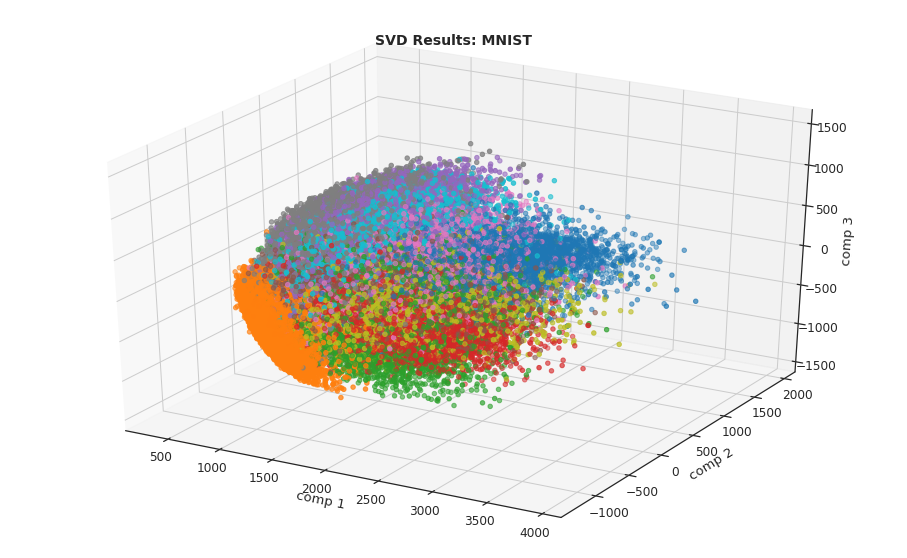

time: 1.37 s (started: 2022-11-03 05:50:14 +00:00)


In [42]:
plt.figure(figsize = (16, 10))
ax = plt.axes(projection='3d')
ax.scatter(
    xs=mnist_svd3.loc[:, 'comp1'], 
    ys=mnist_svd3.loc[:, 'comp2'], 
    zs=mnist_svd3.loc[:, 'comp3'], 
    c=mnist_svd3.loc[:, 'label'].astype(int), 
    cmap='tab10'
)
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')
plt.title('SVD Results: MNIST', weight='bold').set_fontsize('14')
plt.show()